In [1]:
import deepxde as dde
import matplotlib.pyplot as plt
from deepxde.backend import tf
import numpy as np
import pandas as pd

Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.



Instructions for updating:
non-resource variables are not supported in the long term


## 1. This is to load the data points of the Airfoil (NACA 0015)
Ths is a symmetric Airfoil.

Starting point of Airfoil Boundary : (1.0,1e-05)
Ending point of Airfoil Boundary : (1.0,-1e-05)


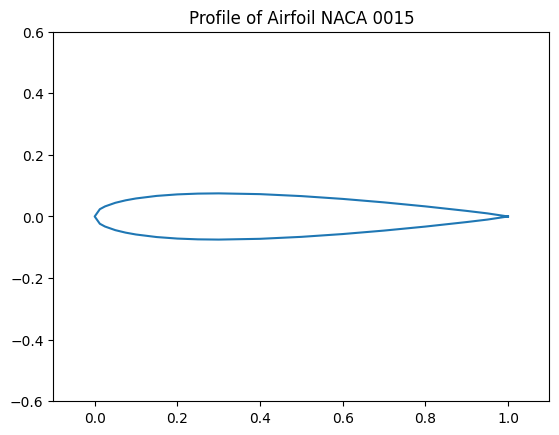

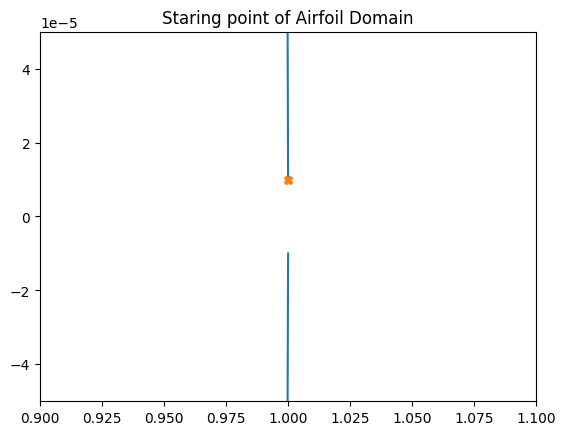

In [2]:
Airfoil_0015 = np.array([
[1.0000   ,   0.00001],
[0.9500   ,   0.01008],
[0.9000   ,   0.01810],
[0.8000   ,   0.03279],
[0.7000   ,   0.04580],
[0.6000   ,   0.05704],
[0.5000   ,   0.06617],
[0.4000   ,   0.07254],
[0.3000   ,   0.07502],
[0.2500   ,   0.07427],
[0.2000   ,   0.07172],
[0.1500   ,   0.06682],
[0.1000   ,   0.05853],
[0.0750   ,   0.05250],
[0.0500   ,   0.04443],
[0.0250   ,   0.03268],
[0.0125   ,   0.02367],
[0.0000   ,   0.00000],
[0.0125   ,  -0.02367],
[0.0250   ,  -0.03268],
[0.0500   ,  -0.04443],
[0.0750   ,  -0.05250],
[0.1000   ,  -0.05853],
[0.1500   ,  -0.06682],
[0.2000   ,  -0.07172],
[0.2500   ,  -0.07427],
[0.3000   ,  -0.07502],
[0.4000   ,  -0.07254],
[0.5000   ,  -0.06617],
[0.6000   ,  -0.05704],
[0.7000   ,  -0.04580],
[0.8000   ,  -0.03279],
[0.9000   ,  -0.01810],
[0.9500   ,  -0.01008],
[1.0000   ,  -0.00001]
])
'''Loading the data of the geometry of airfoil into array x_geo and y_geo'''
x_geo_0015 = Airfoil_0015[:,0]
y_geo_0015 = Airfoil_0015[:,1]

# To plot the profile of airfoil
plt.figure()
plt.plot(x_geo_0015,y_geo_0015)
plt.xlim(-0.1,1.1)
plt.ylim(-0.6,0.6)
plt.title("Profile of Airfoil NACA 0015")

# To plot the points that we'll be using for doamin definition
plt.figure()
plt.plot(x_geo_0015,y_geo_0015)
plt.plot(x_geo_0015[0],y_geo_0015[0],'X')
plt.xlim(0.9,1.1)
plt.ylim(-0.00005,0.00005)
plt.title("Staring point of Airfoil Domain")

# Will be used in definig the domain
print(f"Starting point of Airfoil Boundary : ({x_geo_0015[0]},{y_geo_0015[0]})")
print(f"Ending point of Airfoil Boundary : ({x_geo_0015[-1]},{y_geo_0015[-1]})")

## 2. To specifiy the Domain
The domain contains the airfoil attached with a thin section to the rectangle to form a valid polygon, that will be using in the computation.           
Following is the figure to show the domain.

In [3]:
additional_points_0015 = np.array([
    [-0.1,-0.6],[-0.1,0.6],[1.1,0.6],[1.1,0.00001],[1.1,-0.00001],[1.1,-0.6]
])
combined_points_0015 = np.vstack((
    additional_points_0015[:4],
    Airfoil_0015,
    additional_points_0015[4:]))

print(combined_points_0015)

[[-1.000e-01 -6.000e-01]
 [-1.000e-01  6.000e-01]
 [ 1.100e+00  6.000e-01]
 [ 1.100e+00  1.000e-05]
 [ 1.000e+00  1.000e-05]
 [ 9.500e-01  1.008e-02]
 [ 9.000e-01  1.810e-02]
 [ 8.000e-01  3.279e-02]
 [ 7.000e-01  4.580e-02]
 [ 6.000e-01  5.704e-02]
 [ 5.000e-01  6.617e-02]
 [ 4.000e-01  7.254e-02]
 [ 3.000e-01  7.502e-02]
 [ 2.500e-01  7.427e-02]
 [ 2.000e-01  7.172e-02]
 [ 1.500e-01  6.682e-02]
 [ 1.000e-01  5.853e-02]
 [ 7.500e-02  5.250e-02]
 [ 5.000e-02  4.443e-02]
 [ 2.500e-02  3.268e-02]
 [ 1.250e-02  2.367e-02]
 [ 0.000e+00  0.000e+00]
 [ 1.250e-02 -2.367e-02]
 [ 2.500e-02 -3.268e-02]
 [ 5.000e-02 -4.443e-02]
 [ 7.500e-02 -5.250e-02]
 [ 1.000e-01 -5.853e-02]
 [ 1.500e-01 -6.682e-02]
 [ 2.000e-01 -7.172e-02]
 [ 2.500e-01 -7.427e-02]
 [ 3.000e-01 -7.502e-02]
 [ 4.000e-01 -7.254e-02]
 [ 5.000e-01 -6.617e-02]
 [ 6.000e-01 -5.704e-02]
 [ 7.000e-01 -4.580e-02]
 [ 8.000e-01 -3.279e-02]
 [ 9.000e-01 -1.810e-02]
 [ 9.500e-01 -1.008e-02]
 [ 1.000e+00 -1.000e-05]
 [ 1.100e+00 -1.000e-05]


## 3. Boundary Conditions

In [4]:
'''
The maximum value of x is : 1.0
The maximum value of y is : 0.25845
The minimum value of x is : -2.7612e-07
The minimum value of y is : -0.24166
'''
def plot_points(points, color="k", marker="."):
    figure = plt.figure()
    axis = figure.add_subplot(111)
    axis.scatter(points[:, 0], points[:, 1], color=color, marker=marker)
    plt.show()

# The points on the Airfoil inside domain (rectangle)
def Airfoil_boundary_0015(x, on_boundary):
    """Check for points on the surface of the airfoil"""
    return  (x[0] > 0 and x[0] < 1 and x[1] < 0.00158 and x[1] > -0.00158)

# The points at the inlet of domain (Left side of rectangle)
def inlet_boundary_0015(x, on_boundary):
    """Check for points on left wall boundary"""
    return on_boundary and np.isclose(x[0], -0.1)

#The inlet velocity
def uniform_velocity_0015(x):
    """Unifrom Velocity velocity"""
    u_inlet = 1
    uniform_velocity = np.full((x.shape[0],1),u_inlet)
    return uniform_velocity.reshape(-1,1)

# Zero velocity points.
def zero_velocity_0015(x):
    """Zero velocity"""
    return np.zeros((x.shape[0], 1))

# The points at the outlet of domain (Top,Back,left) of the wall boundary
def outlet_boundary_0015(x,on_boundary):
    return np.isclose(x[0],1.1) or np.isclose(x[1],0.6) or np.isclose(x[1],-0.6) 


## 4. Govering equation definition (Continuity and Navier strokes equation)
In the following governing equation we have assumed incompressible, viscous flow. With no assumption of invicid nature.

In [5]:
def navier_stokes(x, y):
    """Reynold Number"""
    Re = 100000 # Taken the Reynold's number to be 1e+5 that's practical
    eps = 1e-8

    u, v, p = y[:, 0:1], y[:, 1:2], y[:, 2:3]

    du = tf.gradients(u, x)[0]
    dv = tf.gradients(v, x)[0]
    dp = tf.gradients(p, x)[0]

    p_x, p_y = dp[:, 0:1], dp[:, 1:2]
    u_x, u_y = du[:, 0:1], du[:, 1:2]
    v_x, v_y = dv[:, 0:1], dv[:, 1:2]

    u_xx = tf.gradients(u_x, x)[0][:, 0:1]
    u_yy = tf.gradients(u_y, x)[0][:, 1:2]

    v_xx = tf.gradients(v_x, x)[0][:, 0:1]
    v_yy = tf.gradients(v_y, x)[0][:, 1:2]

    '''Continiuty Equation'''
    continuity = u_x + v_y + eps * p
    '''Momentum Equation'''
    x_momentum = u * u_x + v * u_y +  p_x -  (1/Re) * (u_xx + u_yy)
    y_momentum = u * v_x + v * v_y +  p_y -  (1/Re) * (v_xx + v_yy)

    return [continuity, x_momentum, y_momentum]

## 5. Boundary condition definition in DeepXDE

In [6]:
if __name__ == '__main__':
    '''Defing the Domain in DeepXDE'''
    geom_0015 = dde.geometry.Polygon(combined_points_0015)

    '''X_ Velocity at inlet of doamin (leftside of domain) is U_inlet'''
    inlet_x_0015 = dde.icbc.DirichletBC(geom_0015, uniform_velocity_0015, inlet_boundary_0015,component=0)
    '''Y_Velocity at outlet of domain (leftside of domain) is 0)'''
    inlet_y_0015 = dde.icbc.DirichletBC(geom_0015, zero_velocity_0015, inlet_boundary_0015, component=1)
    '''X_Velocity at the surface of Airfoil is zero'''
    Airfoil_x_0015 = dde.icbc.DirichletBC(geom_0015, zero_velocity_0015, Airfoil_boundary_0015, component=0)
    '''Y_velocity at the surface of Airfoil is zero'''
    Airfoil_y_0015 = dde.icbc.DirichletBC(geom_0015, zero_velocity_0015, Airfoil_boundary_0015, component=1)
    '''Presuure at the inlet is gauge pressure'''
    Pressure_inlet_0015 = dde.icbc.DirichletBC(geom_0015,zero_velocity_0015,inlet_boundary_0015,component=2)
    '''Stress at the other three boundary of domian is zero'''
    Outlet_x_0015 = dde.icbc.NeumannBC(geom_0015,zero_velocity_0015,outlet_boundary_0015,component=0)
    Outlet_y_0015 = dde.icbc.NeumannBC(geom_0015,zero_velocity_0015,outlet_boundary_0015,component=1)

    '''Setting up the Specified domain with appropriate Boundary condition, Governing equation and Neurons'''
    data_0015 = dde.data.PDE(
        geom_0015, navier_stokes,
        [inlet_x_0015,inlet_y_0015,Airfoil_x_0015,Airfoil_y_0015,Pressure_inlet_0015,Outlet_x_0015,Outlet_y_0015],
        num_domain=1000, num_boundary=3000,
        num_test=5000
    )

    '''Defining neural network'''
    layer_size_0015 = [2] + [50] * 6 + [3]
    net_0015 = dde.nn.FNN(layer_size_0015, "tanh", "Glorot uniform")

    '''Compiling the model'''
    model_0015 = dde.Model(data_0015, net_0015)
    model_0015.compile("adam", lr=0.001)

Compiling model...
Building feed-forward neural network...
'build' took 0.139702 s


'compile' took 10.890092 s



# When training for 1000 epoch

In [7]:
model_0015.train(epochs = 1000,display_every = 100,disregard_previous_best=True)

Training model...

Step      Train loss                                                                                              Test loss                                                                                               Test metric
0         [4.13e-02, 8.48e-02, 3.35e-01, 9.47e-01, 1.33e-04, 5.07e-02, 3.20e-04, 5.04e-02, 1.99e-02, 1.34e-03]    [4.25e-02, 8.94e-02, 3.48e-01, 9.47e-01, 1.33e-04, 5.07e-02, 3.20e-04, 5.04e-02, 1.99e-02, 1.34e-03]    []  
100       [4.46e-02, 3.79e-04, 6.04e-04, 7.15e-02, 9.02e-03, 9.67e-02, 1.00e-05, 1.84e-05, 8.04e-03, 3.12e-02]    [5.41e-02, 2.89e-04, 3.51e-04, 7.15e-02, 9.02e-03, 9.67e-02, 1.00e-05, 1.84e-05, 8.04e-03, 3.12e-02]    []  
200       [4.35e-02, 8.41e-04, 2.11e-03, 6.15e-02, 1.51e-02, 9.19e-02, 1.91e-05, 3.02e-05, 1.10e-02, 1.52e-02]    [4.49e-02, 5.50e-04, 1.53e-03, 6.15e-02, 1.51e-02, 9.19e-02, 1.91e-05, 3.02e-05, 1.10e-02, 1.52e-02]    []  
300       [4.26e-02, 1.71e-03, 3.51e-03, 5.91e-02, 1.06e-02, 8.98e-02, 1.32e-05, 2

(<deepxde.model.LossHistory at 0x1477737fcd0>,
 <deepxde.model.TrainState at 0x147790831d0>)

## A function to plot the results (Contour) of Velocities and Pressure

In [8]:
def result(model,x_geo,y_geo):
    x = np.linspace(-0.1,1.1,1000)
    y = np.linspace(-0.6,0.6,1000)
    X,Y = np.meshgrid(x,y)
    points = np.column_stack([X.ravel(),Y.ravel()])

    prediction = model.predict(points)
    U = prediction[:,0]
    V = prediction[:,1]
    P = prediction[:,2]

    U_grid = U.reshape(X.shape)
    V_grid = V.reshape(X.shape)
    P_grid = P.reshape(X.shape)

    plt.figure(1)
    contour = plt.contourf(X,Y,U_grid)
    plt.colorbar(contour)
    plt.title("X-Velocity")
    plt.plot(x_geo,y_geo,color = 'black')
    plt.xlim(-0.1,1.1)
    plt.ylim(-0.6,0.6)

    plt.figure(2)
    contour = plt.contourf(X,Y,V_grid)
    plt.colorbar(contour)
    plt.title("Y-Velocity")
    plt.plot(x_geo,y_geo,color = 'black')
    plt.xlim(-0.1,1.1)
    plt.ylim(-0.6,0.6)

    plt.figure(3)
    contour = plt.contourf(X,Y,P_grid)
    plt.colorbar(contour)
    plt.title("Pressure")
    plt.plot(x_geo,y_geo,color = 'black')
    plt.xlim(-0.1,1.1)
    plt.ylim(-0.6,0.6)

# Results for Epoch = 1000 and Activation = 'tanh'

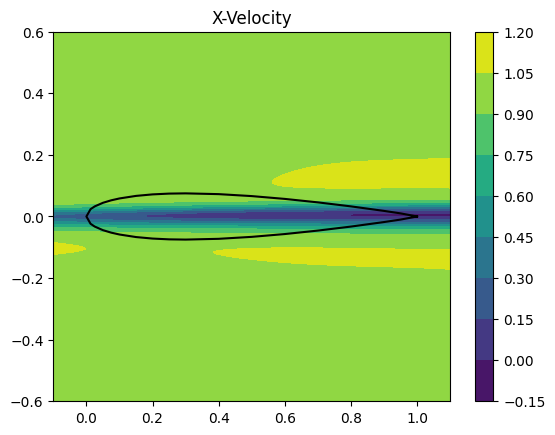

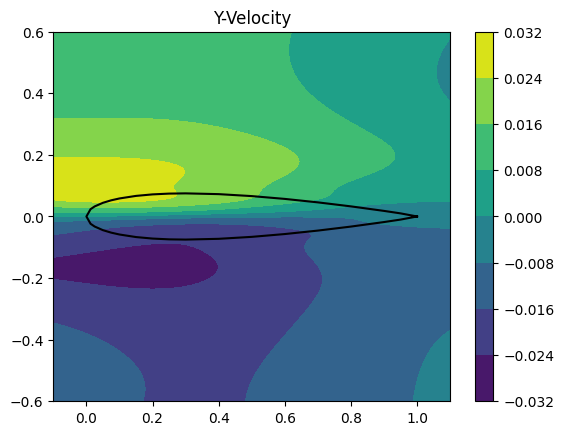

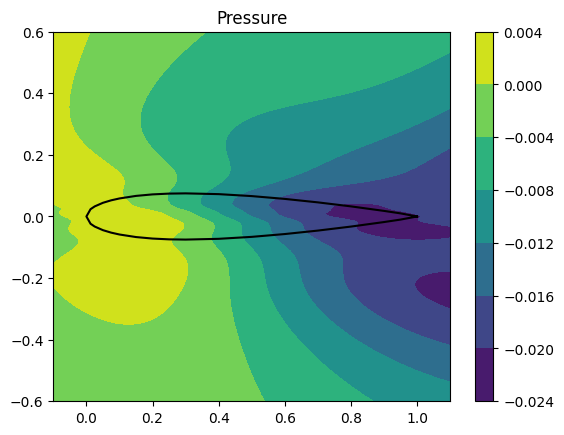

In [9]:
result(model_0015,x_geo_0015,y_geo_0015)

# For 10000 more epoch (Total epoch = 11000)

In [10]:
losshistory_0015,train_state_0015 = model_0015.train(epochs = 10000,display_every = 100,disregard_previous_best=True)

Training model...

Step      Train loss                                                                                              Test loss                                                                                               Test metric
1000      [1.17e-03, 1.18e-03, 2.84e-04, 1.69e-02, 3.10e-04, 6.62e-03, 3.14e-05, 3.26e-06, 1.20e-04, 8.65e-05]    [8.69e-04, 4.08e-04, 2.06e-04, 1.69e-02, 3.10e-04, 6.62e-03, 3.14e-05, 3.26e-06, 1.20e-04, 8.65e-05]    []  
1100      [8.01e-04, 2.27e-04, 2.47e-04, 1.52e-02, 1.46e-04, 5.35e-03, 1.89e-06, 2.41e-06, 8.14e-05, 6.18e-05]    [5.54e-04, 2.04e-04, 1.68e-04, 1.52e-02, 1.46e-04, 5.35e-03, 1.89e-06, 2.41e-06, 8.14e-05, 6.18e-05]    []  
1200      [2.08e-03, 5.21e-04, 4.06e-04, 1.41e-02, 3.76e-05, 4.57e-03, 4.31e-07, 1.25e-05, 1.07e-04, 3.89e-05]    [7.95e-04, 2.70e-04, 1.90e-04, 1.41e-02, 3.76e-05, 4.57e-03, 4.31e-07, 1.25e-05, 1.07e-04, 3.89e-05]    []  
1300      [9.77e-04, 1.21e-03, 2.91e-04, 1.30e-02, 1.52e-04, 3.84e-03, 2.40e-05, 7

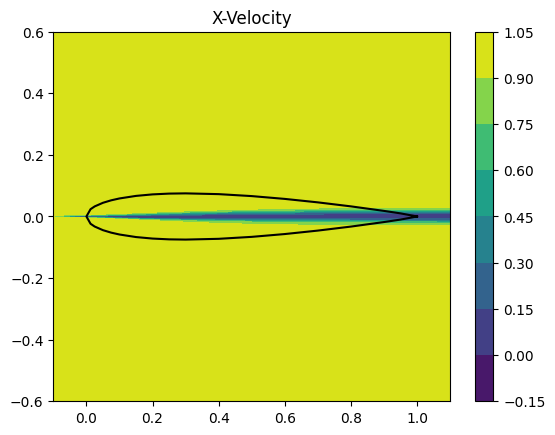

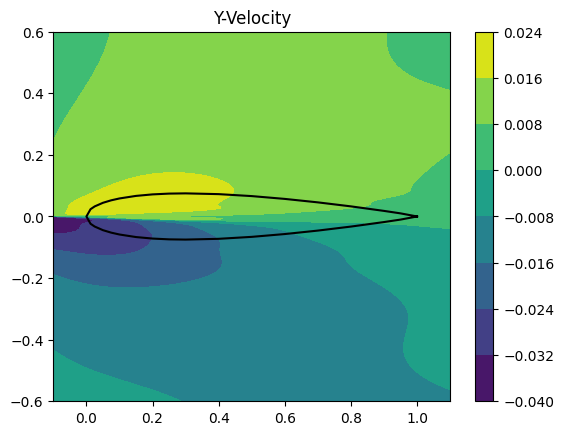

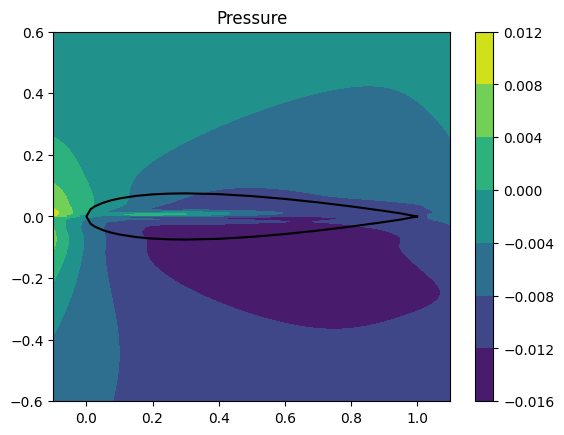

In [43]:
result(model_0015,x_geo_0015,y_geo_0015)


# Looking at the NACA 6409 airfoil

Starting point of Airfoil Boundary : (1.0,1e-05)
Ending point of Airfoil Boundary : (1.0,-1e-05)


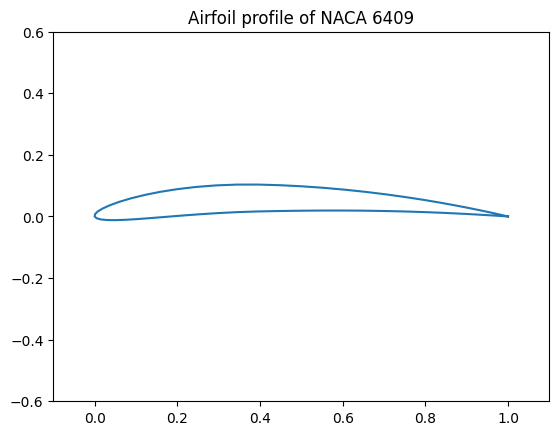

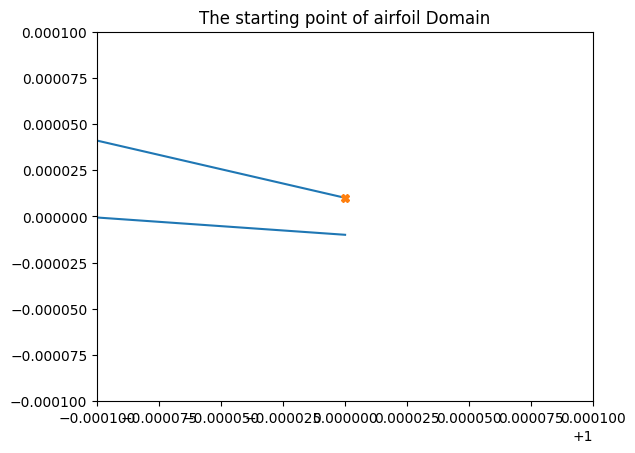

In [16]:
Airfoil_6409 = np.array([
[1.00000 , 0.00001],
  [0.99732 , 0.00084],
  [0.98930 , 0.00333],
  [0.97603 , 0.00737],
  [0.95760 , 0.01284],
  [0.93423 , 0.01954],
  [0.90615 , 0.02724],
  [0.87357 , 0.03571],
  [0.83690 , 0.04464],
  [0.79647 , 0.05378],
  [0.75272 , 0.06283],
  [0.70608 , 0.07153],
  [0.65710 , 0.07961],
  [0.60627 , 0.08684],
  [0.55413 , 0.09302],
  [0.50132 , 0.09796],
  [0.44840 , 0.10152],
  [0.39590 , 0.10360],
  [0.34367 , 0.10352],
  [0.29315 , 0.10086],
  [0.24502 , 0.09584],
  [0.19988 , 0.08874],
  [0.15830 , 0.07992],
  [0.12080 , 0.06982],
  [0.08780 , 0.05889],
  [0.05968 , 0.04762],
  [0.03677 , 0.03646],
  [0.01920 , 0.02581],
  [0.00720 , 0.01603],
  [0.00080 , 0.00737],
  [0.00000 , 0.00000],
  [0.00467 ,-0.00573],
  [0.01467 ,-0.00956],
  [0.02973 ,-0.01157],
  [0.04970 ,-0.01192],
  [0.07428 ,-0.01080],
  [0.10317 ,-0.00844],
  [0.13607 ,-0.00513],
  [0.17257 ,-0.00119],
  [0.21235 , 0.00307],
  [0.25498 , 0.00729],
  [0.30012 , 0.01112],
  [0.34730 , 0.01425],
  [0.39618 , 0.01639],
  [0.44707 , 0.01772],
  [0.49868 , 0.01871],
  [0.55040 , 0.01925],
  [0.60167 , 0.01929],
  [0.65193 , 0.01880],
  [0.70065 , 0.01780],
  [0.74728 , 0.01634],
  [0.79130 , 0.01451],
  [0.83223 , 0.01241],
  [0.86957 , 0.01017],
  [0.90288 , 0.00791],
  [0.93180 , 0.00576],
  [0.95593 , 0.00383],
  [0.97503 , 0.00221],
  [0.98883 , 0.00101],
  [0.99722 , 0.00025],
  [1.00000 , -0.00001],
])
'''Loading the data of the geometry of airfoil into array x_geo and y_geo'''
x_geo_6409 = Airfoil_6409[:,0]
y_geo_6409 = Airfoil_6409[:,1]

# To plot the profile of airfoil
plt.figure()
plt.plot(x_geo_6409,y_geo_6409)
plt.xlim(-0.1,1.1)
plt.ylim(-0.6,0.6)
plt.title("Airfoil profile of NACA 6409")

# To plot the points that we'll be using for doamin definition
plt.figure()
plt.plot(x_geo_6409,y_geo_6409)
plt.plot(x_geo_6409[0],y_geo_6409[0],'X')
plt.xlim(0.9999,1.0001)
plt.ylim(-0.0001,0.0001)
plt.title("The starting point of airfoil Domain")

# Will be used in definig the domain
print(f"Starting point of Airfoil Boundary : ({x_geo_6409[0]},{y_geo_6409[0]})")
print(f"Ending point of Airfoil Boundary : ({x_geo_6409[-1]},{y_geo_6409[-1]})")

In [17]:
additional_points_6409 = np.array([
    [-0.1,-0.6],[-0.1,0.6],[1.1,0.6],[1.1,0.00001],[1.1,-0.00001],[1.1,-0.6]
])
combined_points_6409 = np.vstack((
    additional_points_6409[:4],
    Airfoil_6409,
    additional_points_6409[4:]))

print(combined_points_6409)

[[-1.0000e-01 -6.0000e-01]
 [-1.0000e-01  6.0000e-01]
 [ 1.1000e+00  6.0000e-01]
 [ 1.1000e+00  1.0000e-05]
 [ 1.0000e+00  1.0000e-05]
 [ 9.9732e-01  8.4000e-04]
 [ 9.8930e-01  3.3300e-03]
 [ 9.7603e-01  7.3700e-03]
 [ 9.5760e-01  1.2840e-02]
 [ 9.3423e-01  1.9540e-02]
 [ 9.0615e-01  2.7240e-02]
 [ 8.7357e-01  3.5710e-02]
 [ 8.3690e-01  4.4640e-02]
 [ 7.9647e-01  5.3780e-02]
 [ 7.5272e-01  6.2830e-02]
 [ 7.0608e-01  7.1530e-02]
 [ 6.5710e-01  7.9610e-02]
 [ 6.0627e-01  8.6840e-02]
 [ 5.5413e-01  9.3020e-02]
 [ 5.0132e-01  9.7960e-02]
 [ 4.4840e-01  1.0152e-01]
 [ 3.9590e-01  1.0360e-01]
 [ 3.4367e-01  1.0352e-01]
 [ 2.9315e-01  1.0086e-01]
 [ 2.4502e-01  9.5840e-02]
 [ 1.9988e-01  8.8740e-02]
 [ 1.5830e-01  7.9920e-02]
 [ 1.2080e-01  6.9820e-02]
 [ 8.7800e-02  5.8890e-02]
 [ 5.9680e-02  4.7620e-02]
 [ 3.6770e-02  3.6460e-02]
 [ 1.9200e-02  2.5810e-02]
 [ 7.2000e-03  1.6030e-02]
 [ 8.0000e-04  7.3700e-03]
 [ 0.0000e+00  0.0000e+00]
 [ 4.6700e-03 -5.7300e-03]
 [ 1.4670e-02 -9.5600e-03]
 

In [18]:
print(f"The Maximum X cordinate on the airfoil boundary is {np.max(x_geo_6409)}") 
print(f"The Maximum Y cordinate on the airfoil boundary is {np.max(y_geo_6409)}")
print(f"The Minimum X cordinate on the airfoil boundary is {np.min(x_geo_6409)}") 
print(f"The Minimum Y cordinate on the airfoil boundary is {np.min(y_geo_6409)}") 

The Maximum X cordinate on the airfoil boundary is 1.0
The Maximum Y cordinate on the airfoil boundary is 0.1036
The Minimum X cordinate on the airfoil boundary is 0.0
The Minimum Y cordinate on the airfoil boundary is -0.01192


In [19]:
'''
The Maximum X cordinate on the airfoil boundary is 1.0
The Maximum Y cordinate on the airfoil boundary is 0.1036
The Minimum X cordinate on the airfoil boundary is 0.0
The Minimum Y cordinate on the airfoil boundary is -0.01192
'''
def plot_points_6409(points, color="k", marker="."):
    figure = plt.figure()
    axis = figure.add_subplot(111)
    axis.scatter(points[:, 0], points[:, 1], color=color, marker=marker)
    plt.show()

# The points on the Airfoil inside domain (rectangle)
def Airfoil_boundary_6409(x, on_boundary):
    """Check for points on the surface of the airfoil"""
    return  (x[0] > 0 and x[0] < 1 and x[1] < 0.1036 and x[1] > -0.01192)

# The points at the inlet of domain (Left side of rectangle)
def inlet_boundary_6409(x, on_boundary):
    """Check for points on left wall boundary"""
    return on_boundary and np.isclose(x[0], -0.1)

#The inlet velocity
def uniform_velocity_6409(x):
    """Unifrom Velocity velocity"""
    u_inlet = 1
    uniform_velocity = np.full((x.shape[0],1),u_inlet)
    return uniform_velocity.reshape(-1,1)

# Zero velocity points.
def zero_velocity_6409(x):
    """Zero velocity"""
    return np.zeros((x.shape[0], 1))

# The points at the outlet of domain (Top,Bottom,right) of the wall boundary
def outlet_boundary_6409(x,on_boundary):
    return np.isclose(x[0],1.1) or np.isclose(x[1],0.6) or np.isclose(x[1],-0.6) 


In [20]:
if __name__ == '__main__':
    '''Defing the Domain in DeepXDE'''
    geom_6409 = dde.geometry.Polygon(combined_points_6409)

    '''X_ Velocity at inlet of doamin (leftside of domain) is U_inlet'''
    inlet_x_6409 = dde.icbc.DirichletBC(geom_6409, uniform_velocity_6409, inlet_boundary_6409,component=0)
    '''Y_Velocity at outlet of domain (leftside of domain) is 0)'''
    inlet_y_6409 = dde.icbc.DirichletBC(geom_6409, zero_velocity_6409, inlet_boundary_6409, component=1)
    '''X_Velocity at the surface of Airfoil is zero'''
    Airfoil_x_6409 = dde.icbc.DirichletBC(geom_6409, zero_velocity_6409, Airfoil_boundary_6409, component=0)
    '''Y_velocity at the surface of Airfoil is zero'''
    Airfoil_y_6409 = dde.icbc.DirichletBC(geom_6409, zero_velocity_6409, Airfoil_boundary_6409, component=1)
    '''Presuure at the inlet is gauge pressure'''
    Pressure_inlet_6409 = dde.icbc.DirichletBC(geom_6409,zero_velocity_6409,inlet_boundary_6409,component=2)
    '''Stress at the other three boundary of domian is zero'''
    Outlet_x_6409 = dde.icbc.NeumannBC(geom_6409,zero_velocity_6409,outlet_boundary_6409,component=0)
    Outlet_y_6409 = dde.icbc.NeumannBC(geom_6409,zero_velocity_6409,outlet_boundary_6409,component=1)

    '''Setting up the Specified domain with appropriate Boundary condition, Governing equation and Neurons'''
    data_6409 = dde.data.PDE(
        geom_6409, navier_stokes,
        [inlet_x_6409,inlet_y_6409,Airfoil_x_6409,Airfoil_y_6409,Pressure_inlet_6409,Outlet_x_6409,Outlet_y_6409],
        num_domain=2000, num_boundary=3000,
        num_test=5000
    )

    '''Defining neural network'''
    layer_size_6409 = [2] + [50] * 6 + [3]
    net_6409 = dde.nn.FNN(layer_size_6409, "tanh", "Glorot uniform")

    '''Compiling the model'''
    model_6409 = dde.Model(data_6409, net_6409)
    model_6409.compile("adam", lr=0.001)

Compiling model...
Building feed-forward neural network...
'build' took 0.684122 s

'compile' took 57.560341 s



## For 1000 Epoch

In [21]:
model_6409.train(epochs = 1000,display_every = 100,disregard_previous_best=True)

Training model...

Step      Train loss                                                                                              Test loss                                                                                               Test metric
0         [4.13e-02, 8.57e-02, 3.36e-01, 9.46e-01, 1.32e-04, 2.39e-02, 8.37e-05, 5.02e-02, 1.99e-02, 1.34e-03]    [4.27e-02, 8.93e-02, 3.48e-01, 9.46e-01, 1.32e-04, 2.39e-02, 8.37e-05, 5.02e-02, 1.99e-02, 1.34e-03]    []  
100       [4.76e-02, 5.45e-04, 1.42e-03, 1.14e-01, 1.10e-02, 1.29e-01, 1.14e-04, 1.37e-05, 1.86e-03, 2.84e-02]    [5.74e-02, 4.64e-04, 8.08e-04, 1.14e-01, 1.10e-02, 1.29e-01, 1.14e-04, 1.37e-05, 1.86e-03, 2.84e-02]    []  
200       [5.30e-02, 1.59e-03, 3.69e-03, 1.01e-01, 2.38e-02, 1.15e-01, 3.01e-04, 5.31e-05, 5.65e-03, 1.21e-02]    [5.84e-02, 1.17e-03, 2.02e-03, 1.01e-01, 2.38e-02, 1.15e-01, 3.01e-04, 5.31e-05, 5.65e-03, 1.21e-02]    []  
300       [4.57e-02, 2.21e-03, 4.84e-03, 1.03e-01, 2.19e-02, 1.15e-01, 3.35e-04, 1

(<deepxde.model.LossHistory at 0x1474630d8d0>,
 <deepxde.model.TrainState at 0x1474317c410>)

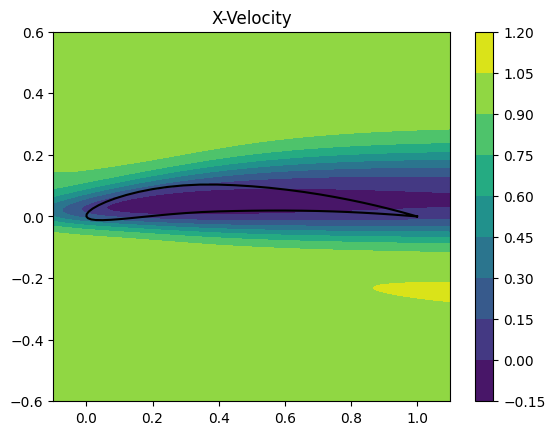

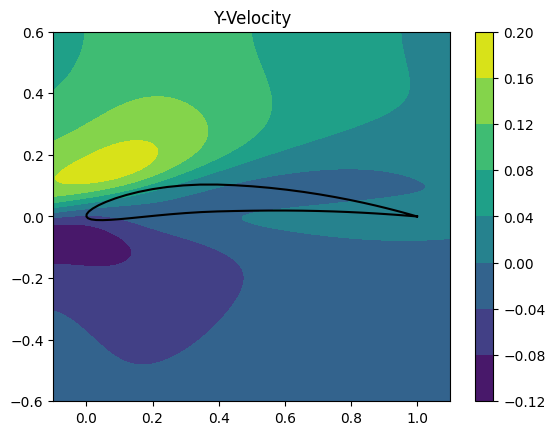

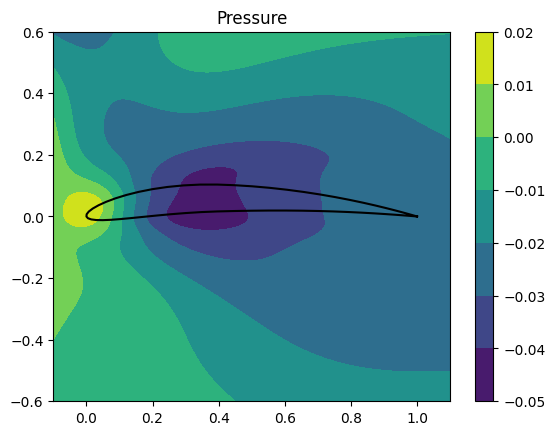

In [22]:
result(model_6409,x_geo_6409,y_geo_6409)

# For 10000 more Epoch

In [23]:
losshistory_6409,train_state_6409 = model_6409.train(epochs = 10000,display_every = 500,disregard_previous_best=True)

Training model...

Step      Train loss                                                                                              Test loss                                                                                               Test metric
1000      [4.15e-03, 4.72e-03, 2.12e-03, 2.66e-02, 7.21e-03, 1.31e-02, 6.19e-04, 5.11e-05, 7.43e-04, 2.06e-04]    [9.37e-03, 3.90e-03, 3.57e-03, 2.66e-02, 7.21e-03, 1.31e-02, 6.19e-04, 5.11e-05, 7.43e-04, 2.06e-04]    []  
1500      [7.86e-03, 4.41e-03, 2.25e-03, 1.97e-02, 6.02e-03, 9.48e-03, 4.84e-04, 5.06e-05, 2.29e-04, 2.53e-04]    [1.91e-02, 6.00e-03, 5.63e-03, 1.97e-02, 6.02e-03, 9.48e-03, 4.84e-04, 5.06e-05, 2.29e-04, 2.53e-04]    []  
2000      [5.87e-03, 5.14e-03, 2.37e-03, 1.40e-02, 6.26e-03, 7.35e-03, 6.71e-04, 1.16e-04, 1.65e-04, 1.07e-04]    [2.10e-02, 1.12e-02, 5.97e-03, 1.40e-02, 6.26e-03, 7.35e-03, 6.71e-04, 1.16e-04, 1.65e-04, 1.07e-04]    []  
2500      [1.02e-02, 5.75e-03, 1.90e-03, 1.02e-02, 5.45e-03, 6.27e-03, 4.20e-04, 1

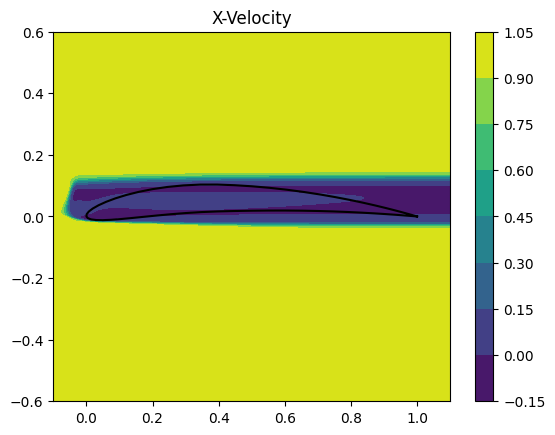

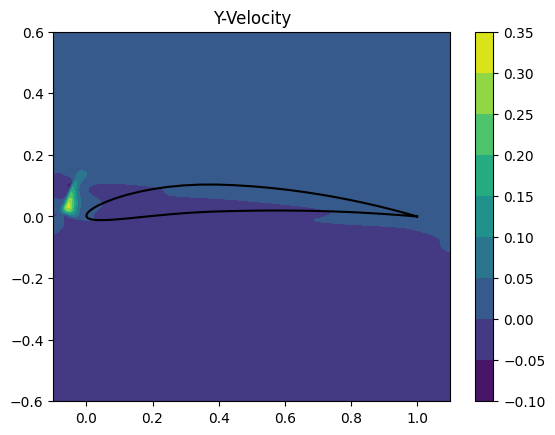

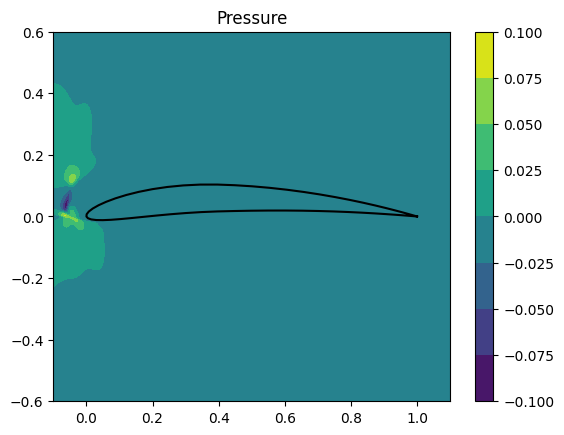

In [44]:
result(model_6409,x_geo_6409,y_geo_6409)


# For the solution of Boundary layer Equation using PINN's
## (On a flat plat with Falkner Skan Equation)
Here we have used the Formulation which makes the boundary layer equation to be as: \
\
Free stream velocity:  $U(x) = Kx^m$ \
\
$\eta(x,y) = y\sqrt{(\frac{m+1}{2})\frac{K}{\nu}}x^{(\frac{m-1}{2})}$
\
The neural network will take in $\eta$ and will return $f(\eta)$, $f'(\eta)$ , $f''(\eta)$

## Defining the Domain to work on:

In [30]:
eta_min = 0
eta_max = 10
Domain_Boundary_layer = dde.geometry.Interval(eta_min,eta_max)

# Governing Equation
The equation we aim to solve here, doesnt need to be for a flat plate. Could be a plate at any angle. Accordingly the parameter that govern the angle of plate is incorporated in the $m = \frac{\beta}{2-\beta}$ \
where, $\beta$ is the angle of inclination divided by $\pi$

In [31]:
# Lets say the angle of inclination is theta
theta = 0
beta = theta/np.pi
m = (beta)/(2-beta)

In [32]:
def Falkner_skan(x,y):
    #Here the x represents the input with is a N*1 matrics of eta as input
    # Y is the output that is the f , f' , f'' which is N*3 matric
    f,f_prime,f_double_prime = y[:,0:1],y[:,1:2],y[:,2:3]

    f_triple_prime = tf.gradients(f_prime,x)[0]
    return f_triple_prime + (f*f_double_prime) + ((2*m)/(m+1))*(1-(f_prime**2))
    

In [33]:
'''Boundary condition for the streamfunction to be zero along surface (eta)'''
def f_boundary_value(x):
    return np.zeros((x.shape[0],1))
def f_boundary(x,on_boundary):
    return np.isclose(x[0],0)

'''Boundary condition for no slip'''
def f_prime_boundary_value(x):
    return np.zeros((x.shape[0],1))
def f_prime_boundary(x,on_boundary):
    return np.isclose(x[0],0)

'''Boundary condition for no_stress at infinity'''
def f_double_prime_boundary_value(x):
    return np.zeros((x.shape[0],1))
def f_double_prime_boundary(x,on_boundary):
    return np.isclose(x[0],10)

In [34]:
'''Boundary condition with deepxde'''
f_condition = dde.icbc.DirichletBC(Domain_Boundary_layer,f_boundary_value,f_boundary,component=0)
f_prime__condition = dde.icbc.DirichletBC(Domain_Boundary_layer,f_prime_boundary_value,f_prime_boundary,component=1)
f_double_prime__condition = dde.icbc.DirichletBC(Domain_Boundary_layer,f_double_prime_boundary_value,f_double_prime_boundary,component=2)

In [35]:
data_boundary_layer = dde.data.PDE(
    Domain_Boundary_layer,
    Falkner_skan,
    [f_condition,f_prime__condition,f_double_prime__condition],
    num_domain=10000, num_boundary=3000,
        num_test=5000
    )

'''Defining neural network'''
layer_size_Boundary = [1] + [50] * 6 + [3]
net_Boundary = dde.nn.FNN(layer_size_Boundary, "relu", "Glorot uniform")

'''Compiling the model'''
model_Boundary = dde.Model(data_boundary_layer, net_Boundary)
model_Boundary.compile("adam", lr=0.001)


Compiling model...
Building feed-forward neural network...
'build' took 0.803277 s

'compile' took 3.461129 s



In [40]:
model_Boundary.train(epochs = 1000,display_every = 100,disregard_previous_best=True)

Training model...

Step      Train loss                                  Test loss                                   Test metric
10000     [7.81e-09, 2.82e-13, 1.05e-13, 7.88e-14]    [3.10e-08, 2.82e-13, 1.05e-13, 7.88e-14]    []  
10100     [1.05e-08, 3.23e-12, 1.38e-12, 5.86e-16]    [3.91e-08, 3.23e-12, 1.38e-12, 5.86e-16]    []  
10200     [1.08e-08, 1.14e-10, 5.73e-11, 3.60e-13]    [4.19e-08, 1.14e-10, 5.73e-11, 3.60e-13]    []  
10300     [1.07e-08, 1.59e-14, 4.01e-15, 9.16e-16]    [4.20e-08, 1.59e-14, 4.01e-15, 9.16e-16]    []  
10400     [9.44e-09, 1.51e-09, 1.04e-09, 1.86e-09]    [3.74e-08, 1.51e-09, 1.04e-09, 1.86e-09]    []  
10500     [8.38e-09, 4.04e-12, 1.85e-12, 2.33e-14]    [3.29e-08, 4.04e-12, 1.85e-12, 2.33e-14]    []  
10600     [8.22e-08, 3.82e-11, 6.41e-07, 2.30e-05]    [1.63e-07, 3.82e-11, 6.41e-07, 2.30e-05]    []  
10700     [3.03e-08, 1.26e-09, 8.21e-11, 1.31e-10]    [1.20e-07, 1.26e-09, 8.21e-11, 1.31e-10]    []  
10800     [1.45e-08, 2.15e-16, 1.59e-15, 6.33e-

(<deepxde.model.LossHistory at 0x1474d26e650>,
 <deepxde.model.TrainState at 0x1474616b050>)

In [37]:
def result_boundary():
    X = np.linspace(-0,10,10000)
    points = np.column_stack([X.ravel()])

    prediction = model_Boundary.predict(points)
    f = prediction[:,0]
    f_prime = prediction[:,1]
    f_double_prime = prediction[:,2]

    f_grid = f.reshape(X.shape)
    f_prime_grid = f_prime.reshape(X.shape)
    f_double_prime_grid = f_double_prime.reshape(X.shape)

    plt.figure(1)
    plt.plot(X,f_grid)
    plt.xlabel("Eta")
    plt.ylabel("f")
    print("shape of f is ",f.shape)
    
    plt.figure(2)
    plt.plot(X,f_prime_grid)
    plt.xlabel("Eta")
    plt.ylabel(" f' ")
    print("shape of f' is ",f_prime.shape)
    
    plt.figure(3)
    plt.plot(X,f_double_prime_grid)
    plt.xlabel("Eta")
    plt.ylabel(" f'' ")
    print("shape of f'' is ",f_double_prime.shape)

shape of f is  (10000,)
shape of f' is  (10000,)
shape of f'' is  (10000,)


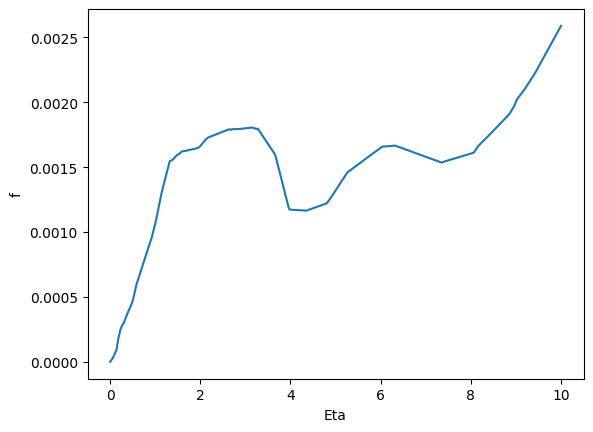

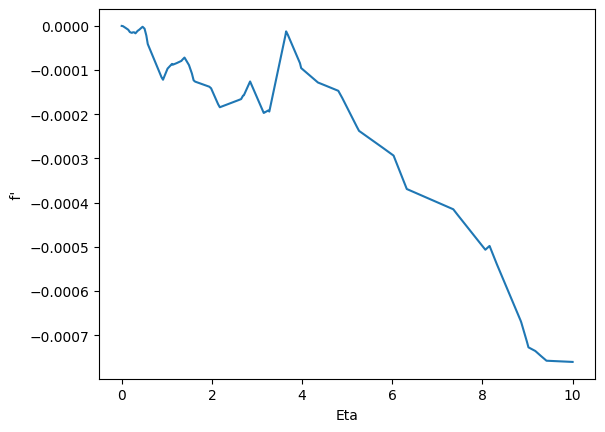

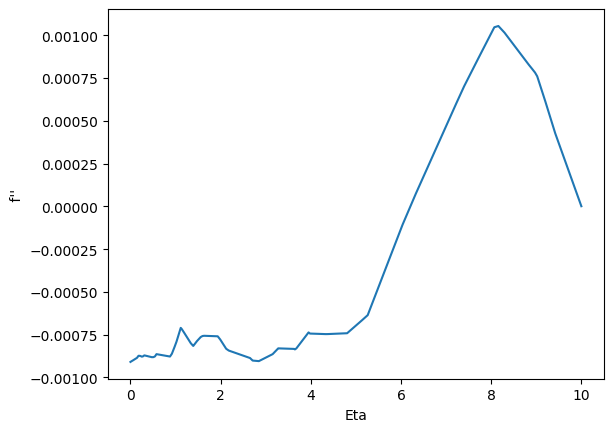

In [41]:
result_boundary()

## Ploting the results of eta on a 2D plane

C:\Users\Arush Chinchkhede\AppData\Local\Temp\ipykernel_19216\2368800527.py:5: RuntimeWarning: divide by zero encountered in power
  eta = Y * ((m + 1) / 2)**0.5 * X**((m - 1) / 2)
C:\Users\Arush Chinchkhede\AppData\Local\Temp\ipykernel_19216\2368800527.py:5: RuntimeWarning: invalid value encountered in multiply
  eta = Y * ((m + 1) / 2)**0.5 * X**((m - 1) / 2)
C:\Users\Arush Chinchkhede\AppData\Local\Temp\ipykernel_19216\2368800527.py:21: RuntimeWarning: divide by zero encountered in power
  eta = Y * ((m + 1) / 2)**0.5 * X**((m - 1) / 2)
C:\Users\Arush Chinchkhede\AppData\Local\Temp\ipykernel_19216\2368800527.py:21: RuntimeWarning: invalid value encountered in multiply
  eta = Y * ((m + 1) / 2)**0.5 * X**((m - 1) / 2)
C:\Users\Arush Chinchkhede\AppData\Local\Temp\ipykernel_19216\2368800527.py:23: RuntimeWarning: divide by zero encountered in reciprocal
  V = -(((m + 1) / 2) * X**(m - 1))**0.5 * (f_grid + ((m - 1) / (m + 1)) * eta * df_grid)


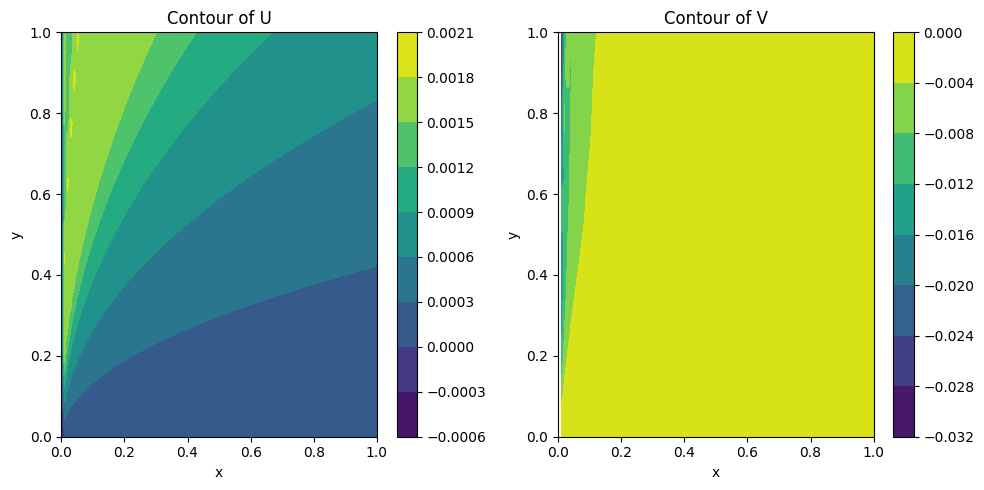

In [42]:
# Define the boundary grid
x_boundary = np.linspace(0, 1, 100)
y_boundary = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x_boundary, y_boundary)
eta = Y * ((m + 1) / 2)**0.5 * X**((m - 1) / 2)
# Flatten the points for model prediction
points = np.column_stack([eta.ravel()])

# Make predictions
prediction = model_Boundary.predict(points)  # Ensure model outputs (10000, 3)
f = prediction[:, 0]
df = prediction[:, 1]
ddf = prediction[:, 2]

# Reshape predictions into grids
f_grid = f.reshape(X.shape)
df_grid = df.reshape(X.shape)
ddf_grid = ddf.reshape(X.shape)

# Compute eta, U, and V with correct grid usage
eta = Y * ((m + 1) / 2)**0.5 * X**((m - 1) / 2)
U = X**m * f_grid
V = -(((m + 1) / 2) * X**(m - 1))**0.5 * (f_grid + ((m - 1) / (m + 1)) * eta * df_grid)

# Plot the contours
plt.figure(figsize=(10, 5))

# Contour plot for U
plt.subplot(1, 2, 1)
contour_U = plt.contourf(X,Y,U)
plt.title('Contour of U')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(contour_U)

# Contour plot for V
plt.subplot(1, 2, 2)
contour_V = plt.contourf(X,Y,V)
plt.title('Contour of V')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(contour_V)

plt.tight_layout()
plt.show()
